In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).all()[-1]
print(latest_date)
latest_date = latest_date[0]

('2017-08-23',)


2017-08-23
2016-08-23


<Axes: xlabel='Date', ylabel='Inches'>

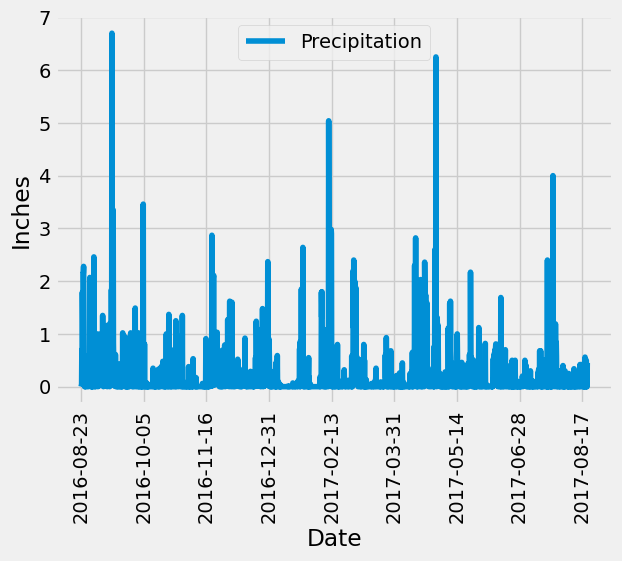

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(latest_date)

# Calculate the date one year from the last date in data set.
one_year_from_latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d').date() - dt.timedelta(365)
print(one_year_from_latest_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_from_latest_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation']).dropna()

# Sort the dataframe by date
df = df.sort_values('Date').set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel='Date', ylabel='Inches')

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
selection = [measurement.station, func.count(measurement.station)]
most_active_stations = session.query(*selection).group_by(selection[0]).order_by(selection[1].desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
selection = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
session.query(*selection).filter(measurement.station==most_active_stations[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

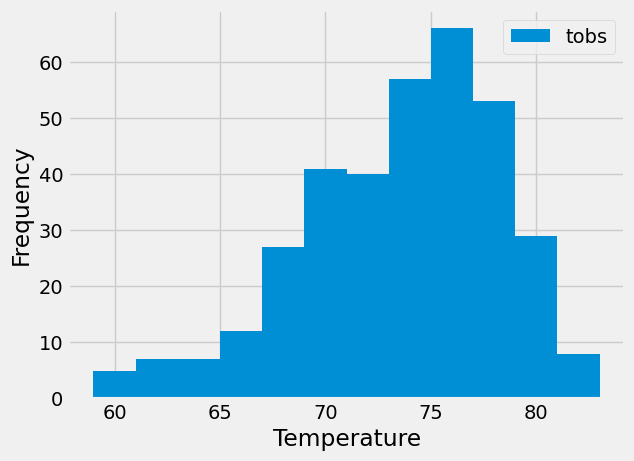

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).filter((measurement.date>=one_year_from_latest_date) & 
                                                 (measurement.station==most_active_stations[0][0])).all()

plot = pd.DataFrame(results).tobs.hist(bins=12, legend=True)
plot.set_xlabel('Temperature')
plot.set_ylabel('Frequency')


# Close Session

In [31]:
# Close Session
session.close()